# Exploratory Data Analysis and Feature Transformation/Creation

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import f1_score, classification_report

from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import mean_squared_error, make_scorer

from sklearn.model_selection import GroupShuffleSplit, ShuffleSplit, GridSearchCV, GroupKFold
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, \
AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

#Show all columns
pd.set_option('display.max_columns', None)

#Display plots inline
%matplotlib inline

#Load data and apply basic filters
df = pd.DataFrame.from_csv('predata.csv').reset_index(drop=True)
df = df.loc[df['Season'] != 2017]
df = df.loc[df['MIN'] >= 100]
df['WSTOT'].fillna(0, inplace=True)
df.rename(columns={'2:00 PM':'2PM', '3:00 PM':'3PM'}, inplace=True)

print "Number of samples:", len(df)
print "Number of features:", len(df.columns)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Number of samples: 4087
Number of features: 55


## Remove Outliers

In [2]:
#Use sorting method to find outliers
df.sort('2P%', ascending=False).head(2)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Url  Season % shots 2pt J  \
1595  http://basketball.realgm.com/player/Francisco-...    2004           NaN   
2761  http://basketball.realgm.com/player/Longar-Lon...    2005           NaN   

     % shots at rim %assisted 2pt J %assisted 3s %assisted at rim  \
1595            NaN             NaN          NaN              NaN   
2761            NaN             NaN          NaN              NaN   

     %of shots 3pt       2P%       2PA       2PM       3P%      3PA      3PAr  \
1595           NaN  1.098964  2.862348  3.056149  0.272227  9.54609  0.693407   
2761           NaN  0.719287  7.656037  5.350261  0.000000  0.00000  0.000000   

           3PM       AST       ATr    A_Score        Age  Agility       BLK  \
1595  2.658151  9.195827  1.906037  11.673089  22.001142     3.33  2.503376   
2761  0.000000  1.830652  0.544473        NaN  21.827854      NaN  3.245152   

             Born       DEF   D_Score  Drafted       FG% FG% 2pt Jumpers  \
1595  1981.998858  6.843972  2.690362   2005.0  0.451251             NaN   
2761  1983.172146  6.817021       NaN   2008.0  0.723078             NaN   

     FG% at rim        FGA       FGM     FGM_z    FT%        FTA       FTM  \
1595        NaN  13.951970  6.226918  0.653459  0.797  13.150238  4.627313   
2761        NaN   7.313557  5.232567  0.653459  0.553  10.492568  2.559760   

           FTr  Height   IS_Score    MIN  Max_Vert  NS_Vert              Name  \
1595  0.417381   201.0  14.633428  425.0      31.5     27.5  Francisco Garcia   
2761  0.635312   211.0        NaN  106.5       NaN      NaN     Longar Longar   

           OFF  OS_Score        PF        PTS  P_Score  Pick       STL  Speed  \
1595  2.227117  3.602339  8.107098  26.558156  3.75271  23.0  3.425672  10.63   
2761  3.428355       NaN  9.762665  13.216330      NaN   NaN  1.336239    NaN   

           TOV        TRB  WSPredict      WSTOT  Weight  Wingspan  
1595  4.826861   8.977757      3.545  18.133939    88.0     82.75  
2761  3.363838  10.161822      0.000   0.000000   104.0     85.50

In [3]:
df.sort('3P%', ascending=False).head(6)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Url  Season % shots 2pt J  \
3258  http://basketball.realgm.com/player/Pape-Sow/S...    2003           NaN   
178   http://basketball.realgm.com/player/Alex-Steph...    2012           NaN   
2459  http://basketball.realgm.com/player/Kadeem-Bat...    2016           NaN   
3602  http://basketball.realgm.com/player/Russell-Hi...    2009           NaN   
2160  http://basketball.realgm.com/player/Joakim-Noa...    2007           NaN   
1423  http://basketball.realgm.com/player/Drew-Gordo...    2012        47.30%   

     % shots at rim %assisted 2pt J %assisted 3s %assisted at rim  \
3258            NaN             NaN          NaN              NaN   
178             NaN             NaN          NaN              NaN   
2459            NaN             NaN          NaN              NaN   
3602            NaN             NaN          NaN              NaN   
2160            NaN             NaN          NaN              NaN   
1423         52.20%          61.80%      100.00%           66.40%   

     %of shots 3pt       2P%        2PA       2PM       3P%       3PA  \
3258           NaN  0.404222  13.222008  5.192612  1.047028  0.871495   
178            NaN  0.532518  10.516553  5.090293  0.883329  0.073079   
2459           NaN  0.406368  13.807895  5.112447  0.858787  0.121189   
3602           NaN  0.399103  16.741451  6.491523  0.837622  0.103102   
2160           NaN  0.540775  12.520224  6.578057  0.837622  0.035838   
1423         0.60%  0.481394  14.742624  6.895155  0.837622  0.069476   

          3PAr       3PM       AST       ATr    A_Score        Age  Agility  \
3258  0.064682  0.933352  1.110812  0.332061   5.568250  21.109132    3.270   
178   0.007212  0.060562  1.649011  0.581176        NaN  24.400228    3.480   
2459  0.009008  0.098995  0.322496  0.097388        NaN  24.486301    3.485   
3602  0.006484  0.088336  0.727834  0.222473        NaN  23.711644      NaN   
2160  0.003026  0.030705  3.794879  1.034498  14.388073  21.850913    3.470   
1423  0.004971  0.059526  1.757461  0.602756        NaN  21.469863    3.445   

           BLK         Born        DEF   D_Score  Drafted       FG%  \
3258  1.042470  1981.890868   9.458915  1.217508   2004.0  0.459325   
178   1.431982  1987.599772   8.444386       NaN   2011.0  0.540643   
2459  0.266113  1991.513699   4.973953       NaN   2014.0  0.407816   
3602  3.529113  1985.288356   6.899003       NaN   2009.0  0.404601   
2160  2.849121  1985.149087  10.063308  4.587039   2007.0  0.544551   
1423  1.342482  1990.530137  11.622321       NaN   2012.0  0.486239   

     FG% 2pt Jumpers FG% at rim        FGA       FGM     FGM_z    FT%  \
3258             NaN        NaN  13.654641  6.215339  0.653459  0.681   
178              NaN        NaN  10.650999  5.274507  0.569594  0.535   
2459             NaN        NaN  14.050040  5.299399  0.581317  0.743   
3602             NaN        NaN  16.113706  6.456330  0.653459  0.639   
2160             NaN        NaN  12.002265  6.470758  0.653459  0.663   
1423          33.50%     72.40%  14.164778  6.815988  0.653459  0.752   

            FTA       FTM       FTr  Height   IS_Score    MIN  Max_Vert  \
3258  13.455206  4.045211  0.436359   208.0   6.030657  283.0     31.50   
178   11.317928  2.029747  0.456066   208.0        NaN  246.0       NaN   
2459   6.511566  1.645462  0.200152   206.0        NaN  142.3     34.00   
3602  10.044902  2.835059  0.276048   208.0        NaN  183.0       NaN   
2160  11.390519  3.335386  0.420257   211.0  16.886308  517.0     37.50   
1423   7.601038  2.522733  0.237628   206.0        NaN  539.0     34.25   

      NS_Vert            Name       OFF  OS_Score        PF        PTS  \
3258    28.00        Pape Sow  4.235854  0.661525  8.074081  17.499163   
178     33.50  Alex Stepheson  5.106087       NaN  4.620725  13.130204   
2459    24.75    Kadeem Batts  2.433418       NaN  8.834127  12.605595   
3602      NaN   Russell Hicks  5.532384       NaN  9.824938  15.963254   
2160    32.50     Joakim Noa

In [4]:
# Drop low quality data
df.drop([1595, 3258, 178], inplace=True)

In [5]:
# Max out 3P% at 75%
list3p = list(df['3P%'])
list3p_fixed = []
for item in list3p:
    if item >= 0.75:
        list3p_fixed.append(np.mean(list3p))
    else:
        list3p_fixed.append(item)
df['3P%'] = list3p_fixed

In [6]:
df.sort('Agility', ascending=True).head(8)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Url  Season % shots 2pt J  \
1137  http://basketball.realgm.com/player/DeAndre-Li...    2010           NaN   
1136  http://basketball.realgm.com/player/DeAndre-Li...    2009           NaN   
1138  http://basketball.realgm.com/player/DeAndre-Li...    2011           NaN   
1139  http://basketball.realgm.com/player/DeAndre-Li...    2015           NaN   
3539  http://basketball.realgm.com/player/Rodrigue-B...    2014           NaN   
3540  http://basketball.realgm.com/player/Rodrigue-B...    2015           NaN   
3541  http://basketball.realgm.com/player/Rodrigue-B...    2016           NaN   
2508  http://basketball.realgm.com/player/Keith-Horn...    2015        29.50%   

     % shots at rim %assisted 2pt J %assisted 3s %assisted at rim  \
1137            NaN             NaN          NaN              NaN   
1136            NaN             NaN          NaN              NaN   
1138            NaN             NaN          NaN              NaN   
1139            NaN             NaN          NaN              NaN   
3539            NaN             NaN          NaN              NaN   
3540            NaN             NaN          NaN              NaN   
3541            NaN             NaN          NaN              NaN   
2508         21.10%          34.50%       93.10%           30.90%   

     %of shots 3pt       2P%       2PA       2PM       3P%       3PA  \
1137           NaN  0.467714  4.122350  1.873241  0.266364  3.510718   
1136           NaN  0.399459  6.020442  2.336518  0.196841  3.284223   
1138           NaN  0.394541  6.629958  2.541390  0.327510  2.882822   
1139           NaN  0.152032  1.462748  0.586534  0.090637  1.069718   
3539           NaN  0.348799  7.258808  2.306868  0.245613  5.011010   
3540           NaN  0.292604  5.623707  2.568160  0.170226  3.679201   
3541           NaN  0.253944  4.190188  2.026443  0.202224  3.480872   
2508        49.50%  0.401092  6.972070  2.716907  0.329186  5.546499   

          3PAr       3PM       AST       ATr   A_Score        Age  Agility  \
1137  0.441241  0.957066  2.253037  1.622742  1.854618  21.751142    0.000   
1136  0.346328  0.662086  6.970505  1.429036  1.854618  20.751142    0.000   
1138  0.300542  0.966503  3.539282  2.006299  1.854618  22.751142    0.000   
1139  0.133781  0.278883  2.038422  1.049750  1.854618  26.751142    0.000   
3539  0.405639  1.169517  4.286184  1.187510  9.034732  25.853653    1.575   
3540  0.227067  1.023588  3.010558  1.361945  9.034732  26.853653    1.575   
3541  0.213460  1.395796  1.721243  0.830772  9.034732  27.853653    1.575   
2508  0.426551  1.869697  2.460542  1.687479       NaN  22.920548    2.640   

           BLK         Born       DEF   D_Score  Drafted       FG%  \
1137  0.704807  1988.248858  4.576315  0.508272   2011.0  0.375893   
1136  0.995468  1988.248858  5.540212  0.508272   2011.0  0.324757   
1138  0.968780  1988.248858  4.904929  0.508272   2011.0  0.380379   
1139  0.197569  1988.248858  1.935313  0.508272   2011.0  0.127224   
3539  0.130993  1988.146347  4.303266  2.594408   2009.0  0.303913   
3540  0.146278  1988.146347  2.237827  2.594408   2009.0  0.240475   
3541  0.178928  1988.146347  1.414167  2.594408   2009.0  0.228119   
2508  0.535457  1992.079452  4.273476       NaN   2016.0  0.378584   

     FG% 2pt Jumpers FG% at rim        FGA       FGM     FGM_z       FT%  \
1137             NaN        NaN   8.063407  2.997874  0.653459  0.590000   
1136             NaN        NaN   9.610436  3.091633  0.653459  0.673000   
1138             NaN        NaN   9.720998  3.662820  0.653459  0.648000   
1139             NaN        NaN   2.646909  0.896483  0.573813  0.202058   
3539             NaN        NaN  12.901147  3.620111  0.581317  0.818000   
3540             NaN        NaN   9.775086  3.736784  0.565929  0.516270   
3541             NaN        NaN   8.109558  3.581698  0.582011  0.426872   
2508          26.60%     70.50%  13.177907  4.934692  0.653459  0.784000   

           FTA       FTM       F

In [7]:
#Set minimum agility as 2.7

fixed_agility = []
for item in list(df['Agility']):
    if item <= 2.7:
        fixed_agility.append(np.nan)
    else:
        fixed_agility.append(item)
df['Agility'] = fixed_agility

In [8]:
df.sort('Speed', ascending=True).head()

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Url  Season % shots 2pt J  \
3539  http://basketball.realgm.com/player/Rodrigue-B...    2014           NaN   
3540  http://basketball.realgm.com/player/Rodrigue-B...    2015           NaN   
3541  http://basketball.realgm.com/player/Rodrigue-B...    2016           NaN   
1136  http://basketball.realgm.com/player/DeAndre-Li...    2009           NaN   
1137  http://basketball.realgm.com/player/DeAndre-Li...    2010           NaN   

     % shots at rim %assisted 2pt J %assisted 3s %assisted at rim  \
3539            NaN             NaN          NaN              NaN   
3540            NaN             NaN          NaN              NaN   
3541            NaN             NaN          NaN              NaN   
1136            NaN             NaN          NaN              NaN   
1137            NaN             NaN          NaN              NaN   

     %of shots 3pt       2P%       2PA       2PM       3P%       3PA  \
3539           NaN  0.348799  7.258808  2.306868  0.245613  5.011010   
3540           NaN  0.292604  5.623707  2.568160  0.170226  3.679201   
3541           NaN  0.253944  4.190188  2.026443  0.202224  3.480872   
1136           NaN  0.399459  6.020442  2.336518  0.196841  3.284223   
1137           NaN  0.467714  4.122350  1.873241  0.266364  3.510718   

          3PAr       3PM       AST       ATr   A_Score        Age  Agility  \
3539  0.405639  1.169517  4.286184  1.187510  9.034732  25.853653      NaN   
3540  0.227067  1.023588  3.010558  1.361945  9.034732  26.853653      NaN   
3541  0.213460  1.395796  1.721243  0.830772  9.034732  27.853653      NaN   
1136  0.346328  0.662086  6.970505  1.429036  1.854618  20.751142      NaN   
1137  0.441241  0.957066  2.253037  1.622742  1.854618  21.751142      NaN   

           BLK         Born       DEF   D_Score  Drafted       FG%  \
3539  0.130993  1988.146347  4.303266  2.594408   2009.0  0.303913   
3540  0.146278  1988.146347  2.237827  2.594408   2009.0  0.240475   
3541  0.178928  1988.146347  1.414167  2.594408   2009.0  0.228119   
1136  0.995468  1988.248858  5.540212  0.508272   2011.0  0.324757   
1137  0.704807  1988.248858  4.576315  0.508272   2011.0  0.375893   

     FG% 2pt Jumpers FG% at rim        FGA       FGM     FGM_z       FT%  \
3539             NaN        NaN  12.901147  3.620111  0.581317  0.818000   
3540             NaN        NaN   9.775086  3.736784  0.565929  0.516270   
3541             NaN        NaN   8.109558  3.581698  0.582011  0.426872   
1136             NaN        NaN   9.610436  3.091633  0.653459  0.673000   
1137             NaN        NaN   8.063407  2.997874  0.653459  0.590000   

           FTA       FTM       FTr  Height   IS_Score     MIN   Max_Vert  \
3539  6.044268  1.682251  0.202333   185.0  11.055461   145.5  19.500000   
3540  3.252498  1.085345  0.092948   185.0  11.055461  1289.0  19.500000   
3541  1.971200  0.663556  0.056723   185.0  11.055461  2562.6  19.500000   
1136  5.348288  1.589136  0.246437   198.0   1.810825   274.0  31.166667   
1137  4.970005  1.293903  0.272943   198.0   1.810825   222.5  31.166667   

      NS_Vert               Name       OFF  OS_Score        PF        PTS  \
3539    14.75  Rodrigue Beaubois  1.268302  2.181431  7.056163  10.623057   
3540    14.75  Rodrigue Beaubois  0.436572  2.181431  2.824200   9.687224   
3541    14.75  Rodrigue Beaubois  0.335937  2.181431  2.138787   9.185043   
1136    28.00    DeAndre Liggins  0.450714  0.265133  6.136566   8.661873   
1137    28.00    DeAndre Liggins  1.675341  0.265133  5.913733   8.415972   

       P_Score  Pick       STL  Speed       TOV       TRB  WSPredict    WSTOT  \
3539  3.328439  25.0  0.916951   0.00  3.580543  5.487445   2.163485  4.92697   
3540  3.328439  25.0  1.244873   0.00  1.280345  2.630449   2.163485  4.92697   
3541  3.328439  25.0  0.696742   0.00  0.980022  1.719362   2.163485  4.92697   
1136  0.590109  53.0  1.706517   5.83  4.880074  5.904857   0.560426  1.10873   
1137  0.590109  53.0  1.762017   5.83  1.3890

In [9]:
#Set minimum speed at 9
fixed_speed = []
for item in list(df['Speed']):
    if item <= 9:
        fixed_speed.append(np.nan)
    else:
        fixed_speed.append(item)
df['Speed'] = fixed_speed

In [10]:
#Replace any infinities with nan, athletic zeros with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['Max_Vert'].replace(0, np.nan, inplace=True)
df['NS_Vert'].replace(0, np.nan, inplace=True)
df['Speed'].replace(0, np.nan, inplace=True)
df['Agility'].replace(0, np.nan, inplace=True)

## Create Features

In [11]:
df['Wingspan'] *= 2.54
df['WHr'] = df['Wingspan']/df['Height']
df['WtHr'] = df['Weight']/df['Height']
df['Stocks'] = df['STL'] + df['BLK']
df['Stocks2'] = df['STL']*df['BLK']
df['RSB'] = df['TRB'] + df['STL'] + df['BLK']
df['RSB2'] = df['TRB']*df['STL']*df['BLK']

In [12]:
# Make columns numeric
df.replace('%', '', regex=True, inplace=True)
dfa = df.apply(pd.to_numeric, errors='coerce')
dfa['Name'] = df['Name']
dfa['Url'] = df['Url']

In [13]:
# Create more features
dfb = dfa.loc[dfa['% shots 2pt J'].notnull()].reset_index(drop=True)
dfb['%assisted 2pt J'] /= 100
dfb['%assisted 3s'] /= 100
dfb['%assisted at rim'] /= 100
dfb['% shots 2pt J'] /= 100
dfb['% shots at rim'] /= 100
dfb['%of shots 3pt'] /= 100
dfb['FG% 2pt Jumpers'] /= 100
dfb['FG% at rim'] /= 100
dfb['2ptJ'] = dfb['FGA']*(dfb['% shots 2pt J'])*(dfb['FG% 2pt Jumpers'])
dfb['FGatRim'] = dfb['FGA']*(dfb['% shots at rim'])*(dfb['FG% at rim'])
dfb['RimUnAssisted'] = dfb['FGatRim']*(100 - dfb['%assisted at rim'])
dfb['2ptJUnAssisted'] = dfb['2ptJ']*(100 - dfb['%assisted 2pt J'])
dfb['3ptJUnAssisted'] = dfb['3PA']*(100 - dfb['%assisted 3s'])

dfc = pd.concat([dfb, dfa], ignore_index=True)
df = dfc.groupby(['Name', 'Season']).first().reset_index()
df.replace([np.inf, -np.inf], np.nan, inplace=True)

## Feature Transformation

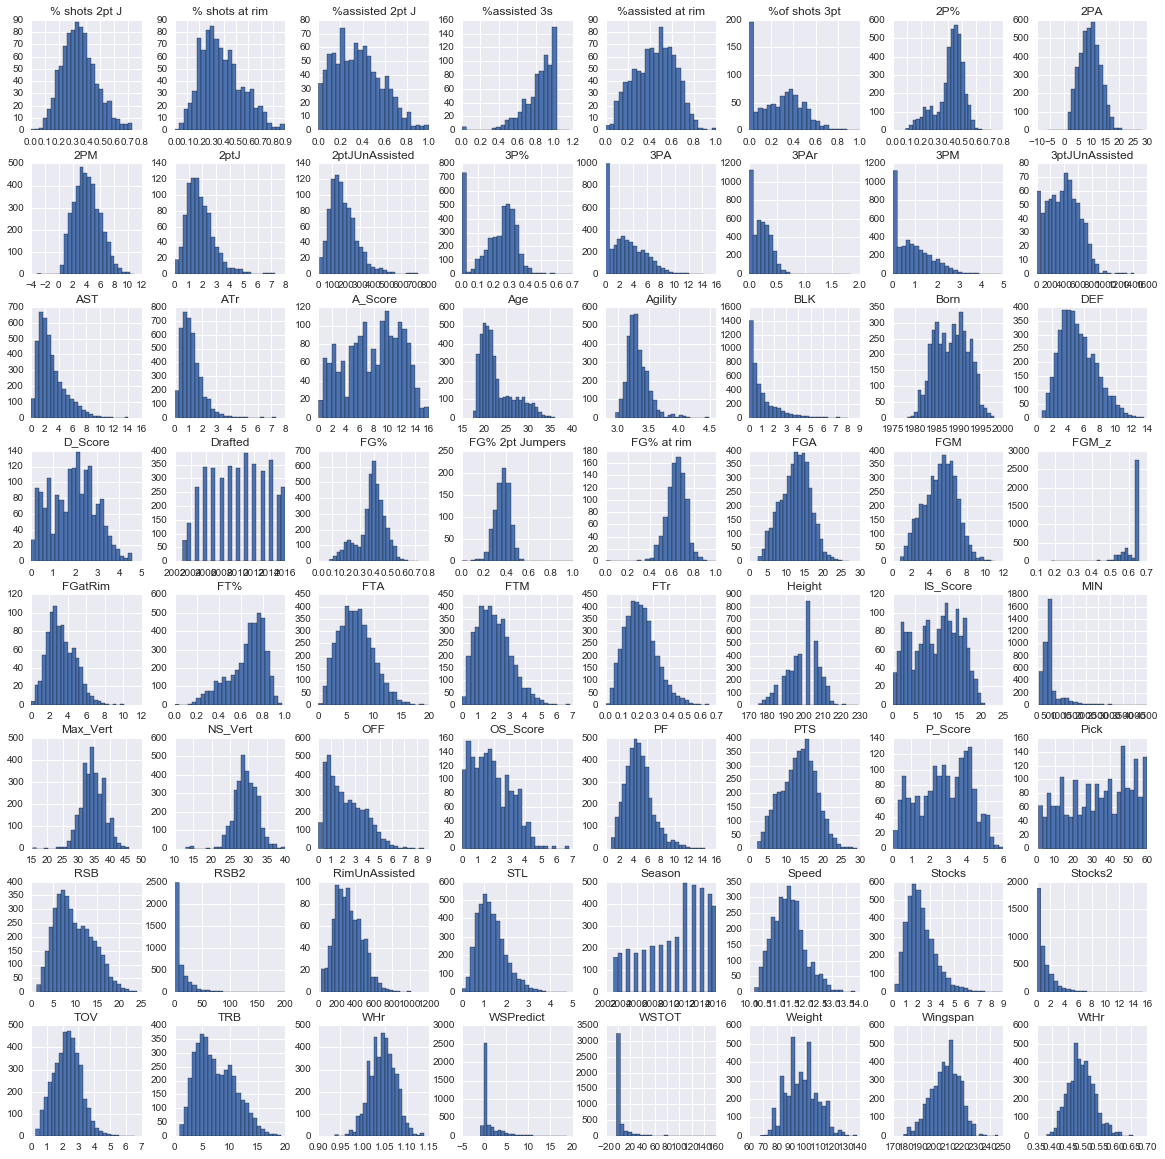

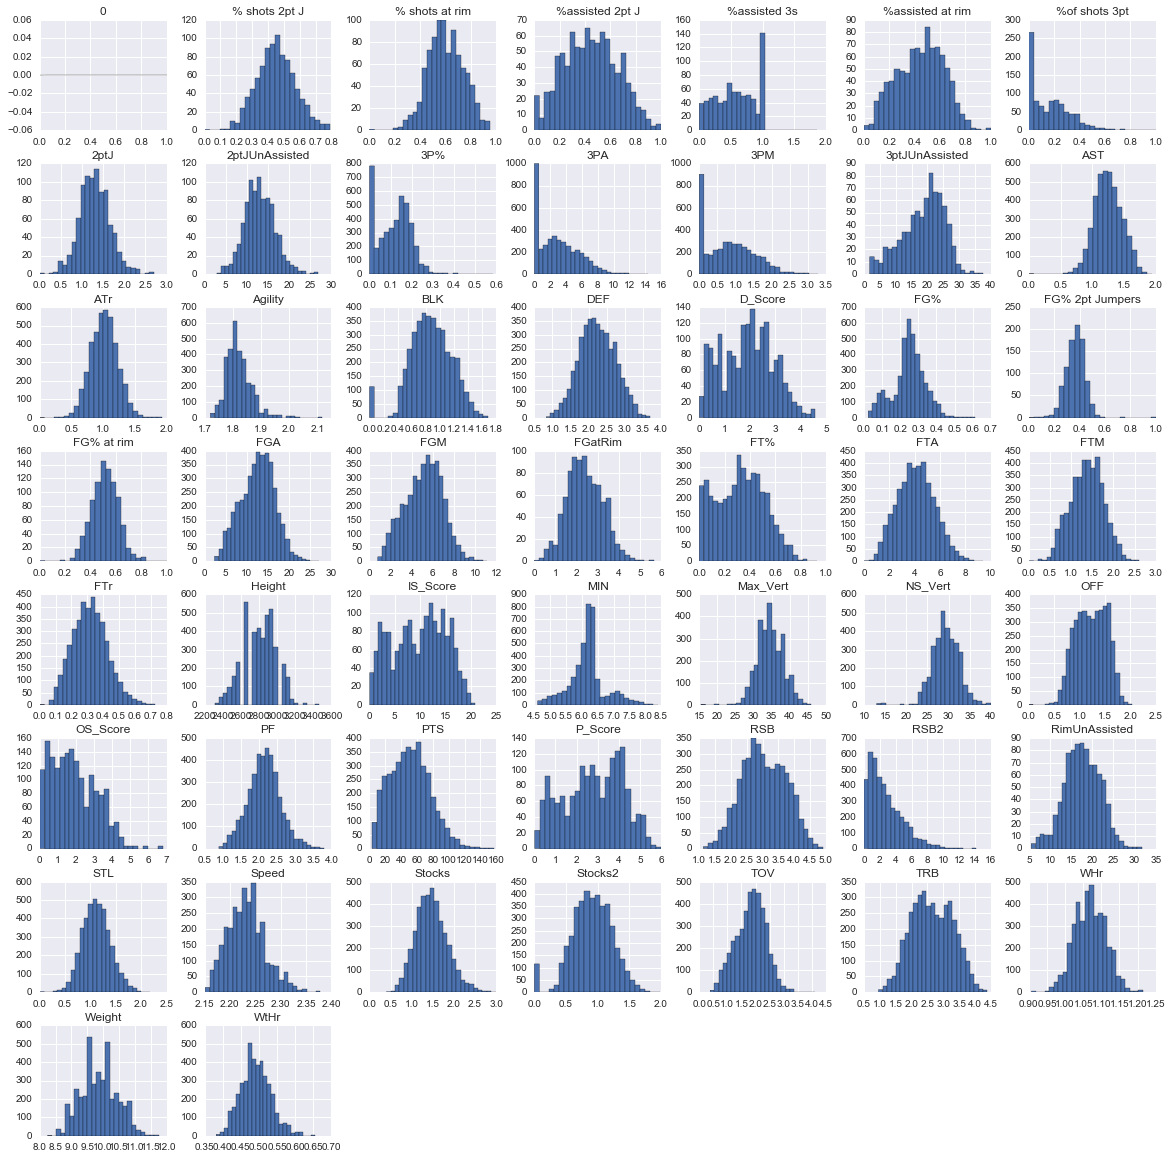

In [15]:
# Classify each feature by skew
none = df[['FG% 2pt Jumpers', 'Max_Vert', 'NS_Vert', 'IS_Score', 'P_Score', 'D_Score', 'OS_Score', \
           '%assisted at rim', '3PA', 'FGA', 'FGM', 'WtHr']]

left_l = df[['FG%', 'FG% at rim', 'Height', 'WHr', '%of shots 3pt', '3P%', 'PTS']]

left = df[[]]

left_s = df[['FT%']]

left_ss = df[['%assisted 3s']]

right_l = df[['3PM', 'FTr', 'FGatRim', 'FTA', '% shots 2pt J', '%assisted 2pt J', 'TOV']]

right = df[['FTM', '% shots at rim', 'PF', 'STL', '2ptJUnAssisted', '3ptJUnAssisted', 'RimUnAssisted', 'TRB', \
            'Weight', 'Agility', 'DEF', '2ptJ', 'Stocks', 'RSB', 'RSB2']]

right_s = df[['OFF', 'ATr', 'Speed']]

right_ss = df[['BLK', 'AST', 'Stocks2']]

log_min = df[['MIN']]

%matplotlib inline
hist = df.hist(figsize=(20, 20), bins=25)

# Feature transformations
one_point_five = lambda x: x**(1.5)
cube = lambda x: x**3
quart = lambda x: x**4
point_seven_five = lambda x: x**(0.75)
point_33 = lambda x: x**(0.33)
point_25 = lambda x: x**(0.25)
lmin = lambda x: np.log(x)

# Apply transformations
left_l2 = left_l.applymap(one_point_five)
left2 = left.applymap(np.square)
left_s2 = left_s.applymap(cube)
left_ss2 = left_ss.applymap(quart)

right_l2 = right_l.applymap(point_seven_five)
right2 = right.applymap(np.sqrt)
right_s2 = right_s.applymap(point_33)
right_ss2 = right_ss.applymap(point_25)

log_min2 = log_min.applymap(lmin)

df2 = pd.concat([none, left_l2, left2, left_s2, left_ss2, right_l2, right2, right_s2, right_ss2, \
                  log_min2], axis=1)

# Show transformed plot
hist2 = df2.hist(figsize=(20, 20), bins=25)

# Use transformed features where possible
df3 = df2.combine_first(df)

## Athletic Scores

In [17]:
# Locate valid athletic samples

max_vert_fill = df3.loc[df3['Max_Vert'].notnull()]
agility_fill = max_vert_fill.loc[max_vert_fill['Agility'].notnull()]
ns_fill = max_vert_fill.loc[max_vert_fill['NS_Vert'].notnull()]
speed_fill = max_vert_fill.loc[max_vert_fill['Speed'].notnull()]

features = ['Height', 'Weight', 'WHr', 'WtHr', 'STL', 'BLK', 'OFF', 'DEF', 'FTr', 'PTS']

X = agility_fill[features].fillna(np.mean(agility_fill[features]))
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns=features)

groups = list(agility_fill['Name'])

y = agility_fill['Agility']
N = float(len(agility_fill))
p = float(len(features))
targets = 1

# GroupKFold to split the data
gkf = GroupKFold(n_splits=10)
for train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]  
    
RMSE = make_scorer(mean_squared_error, greater_is_better = False)

# Test how different algorithms predict agility
def RandomForest(X_train, X_test, Y_train, Y_test):
    reg = RandomForestRegressor(max_features=None)
    reg.fit(X_train, Y_train)
    feature_names = sorted([(features[i], reg.feature_importances_[i]) for i in range(len(features))], \
                           key=lambda x: x[1], reverse=True)
    
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Random Forest"
    print "Feature Names and Importance Scores:", feature_names
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE

def NN(X_train, X_test, Y_train, Y_test):
    reg = KNeighborsRegressor(n_neighbors=20, weights='distance')
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Nearest Neighbor"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def Linear(X_train, X_test, Y_train, Y_test):
    reg = linear_model.LinearRegression()
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Linear Regression"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def Gradient(X_train, X_test, Y_train, Y_test):
    reg = GradientBoostingRegressor()
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Gradient Boost"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def Bagging(X_train, X_test, Y_train, Y_test):
    reg = BaggingRegressor()
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Bagging"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
Linear(X_train, X_test, Y_train, Y_test)
RandomForest(X_train, X_test, Y_train, Y_test)
NN(X_train, X_test, Y_train, Y_test)
Bagging(X_train, X_test, Y_train, Y_test)
Gradient(X_train, X_test, Y_train, Y_test)

Regressor: Linear Regression
R-Squared: 0.187267238747
Adj. R-Squared: 0.184410533083
RMSE: 0.0595452881371

Regressor: Random Forest
Feature Names and Importance Scores: [('WHr', 0.25744428762456828), ('Height', 0.15909013391975627), ('WtHr', 0.12194860580236333), ('Weight', 0.08074991871607598), ('FTr', 0.071164991170414874), ('PTS', 0.069262276199862929), ('STL', 0.063555180668106809), ('OFF', 0.063048594338615677), ('BLK', 0.062427675143103753), ('DEF', 0.051308336417132137)]
R-Squared: -0.14550608095
Adj. R-Squared: -0.149532464363
RMSE: 0.0706923171813
Regressor: Nearest Neighbor
R-Squared: 0.0766033725511
Adj. R-Squared: 0.0733576902051
RMSE: 0.0634698774688

Regressor: Bagging
R-Squared: -0.00355629334533
Adj. R-Squared: -0.00708373198627
RMSE: 0.0661674483829

Regressor: Gradient Boost
R-Squared: 0.0788753937283
Adj. R-Squared: 0.0756376973969
RMSE: 0.0633917454317



In [20]:
# Use linear regressions to fill missing athletic data

X = max_vert_fill[features].fillna(np.mean(max_vert_fill[features]))
y = max_vert_fill['Max_Vert']

lr = linear_model.LinearRegression()
lr.fit(X, y)

dfM = pd.DataFrame(lr.predict(X))
df3['Max_Vert'] = df3['Max_Vert'].fillna(dfM[0])

In [21]:
X = agility_fill[features].fillna(np.mean(agility_fill[features]))
y = agility_fill['Agility'] 

lr.fit(X, y)

X = max_vert_fill[features].fillna(np.mean(max_vert_fill[features]))

dfA = pd.DataFrame(lr.predict(X))
df3['Agility'] = df3['Agility'].fillna(dfA[0])

In [22]:
X = ns_fill[features].fillna(np.mean(ns_fill[features]))
y = ns_fill['NS_Vert']

lr.fit(X, y)

X = max_vert_fill[features].fillna(np.mean(max_vert_fill[features]))

dfN = pd.DataFrame(lr.predict(X))
df3['NS_Vert'] = df3['NS_Vert'].fillna(dfN[0])

In [23]:
X = speed_fill[features].fillna(np.mean(speed_fill[features]))
y = speed_fill['Speed']

lr.fit(X, y)

X = max_vert_fill[features].fillna(np.mean(max_vert_fill[features]))

dfS = pd.DataFrame(lr.predict(X))
df3['Speed'] = df3['Speed'].fillna(dfS[0])

In [24]:
df4 = df3.set_index(['Name', 'Season']).reset_index()

Name  Season  FG% 2pt Jumpers   Max_Vert    NS_Vert  \
0       A.J. Hammons  2013.0            0.325  36.795919  30.326599   
1       A.J. Hammons  2014.0            0.331  36.437310  30.074433   
2       A.J. Hammons  2015.0            0.371  35.223678  29.026302   
3       A.J. Hammons  2016.0            0.407  36.196674  29.888723   
4         A.J. Price  2007.0              NaN  31.000000  26.000000   
5         A.J. Price  2008.0              NaN  31.000000  26.000000   
6         A.J. Price  2009.0              NaN  31.000000  26.000000   
7         A.J. Price  2016.0              NaN  31.000000  26.000000   
8       Aaron Brooks  2004.0              NaN  39.500000  32.500000   
9       Aaron Brooks  2005.0              NaN  39.500000  32.500000   
10      Aaron Brooks  2006.0              NaN  39.500000  32.500000   
11      Aaron Brooks  2007.0              NaN  39.500000  32.500000   
12      Aaron Brooks  2012.0              NaN  39.500000  32.500000   
13       Aaron Craft  2011.0              NaN  33.166667  28.833333   
14       Aaron Craft  2012.0            0.458  33.166667  28.833333   
15       Aaron Craft  2013.0            0.330  33.166667  28.833333   
16       Aaron Craft  2014.0            0.250  33.166667  28.833333   
17       Aaron Craft  2016.0              NaN  33.166667  28.833333   
18      Aaron Gordon  2014.0            0.275  39.000000  32.500000   
19        Aaron Gray  2005.0              NaN  31.500000  26.750000   
20        Aaron Gray  2006.0              NaN  31.500000  26.750000   
21        Aaron Gray  2007.0              NaN  31.500000  26.750000   
22    Aaron Harrison  2014.0            0.336  34.500000  28.500000   
23    Aaron Harrison  2015.0            0.349  34.500000  28.500000   
24       Aaron Miles  2003.0              NaN  37.500000  32.000000   
25       Aaron Miles  2004.0              NaN  37.500000  32.000000   
26       Aaron Miles  2005.0              NaN  37.500000  32.000000   
27       Aaron Miles  2012.0              NaN  37.500000  32.000000   
28       Aaron Miles  2013.0              NaN  37.500000  32.000000   
29       Aaron Miles  2014.0              NaN  37.500000  32.000000   
...              ...     ...              ...        ...        ...   
4054   Willie Warren  2016.0              NaN  31.500000  23.000000   
4055    Xavier Henry  2010.0              NaN  36.500000  28.500000   
4056  Xavier Munford  2013.0            0.333  35.000000  27.000000   
4057  Xavier Munford  2014.0            0.300  35.000000  27.000000   
4058    Xavier Silas  2007.0              NaN  35.500000  29.250000   
4059    Xavier Silas  2008.0              NaN  35.500000  29.250000   
4060    Xavier Silas  2010.0              NaN  35.500000  29.250000   
4061    Xavier Silas  2011.0              NaN  35.500000  29.250000   
4062    Xavier Silas  2014.0              NaN  35.500000  29.250000   
4063    Xavier Silas  2015.0              NaN  35.500000  29.250000   
4064    Xavier Silas  2016.0              NaN  35.500000  29.250000   
4065   Xavier Thames  2010.0              NaN  32.500000  29.000000   
4066   Xavier Thames  2012.0            0.359  32.500000  29.000000   
4067   Xavier Thames  2013.0            0.300  32.500000  29.000000   
4068   Xavier Thames  2014.0            0.401  32.500000  29.000000   
4069   Xavier Thames  2015.0              NaN  32.500000  29.000000   
4070   Youssou Ndoye  2012.0            0.429  31.000000  24.250000   
4071   Youssou Ndoye  2013.0            0.348  31.000000  24.250000   
4072   Youssou Ndoye  2014.0            0.323  31.000000  24.250000   
4073   Youssou Ndoye  2015.0            0.372  31.000000  24.250000   
4074  Zabian Dowdell  2004.0              NaN  33.500000  30.000000   
4075  Zabian Dowdell  2005.0              NaN  33.500000  30.000000   
4076  Zabian Dowdell  2006.0              NaN  33.500000  30.000000   
4077  Zabian Dowdell  2007.0              NaN  33.500000  30.000000   
4078  Zabian Dowdell  2013.0            

In [25]:
# Create new features
df4['Vert_adj'] = df4['Max_Vert']*df4['NS_Vert']
df4['Move_adj'] = df4['Speed']*df4['Agility']

In [26]:
OS_data = df4.loc[df4['OS_Score'].notnull()]
feature_cols = list(OS_data[['3PA', '3PM', 'Agility', 'FGM', 'FT%', 'PTS']])
target_cols = list(OS_data[['OS_Score']])
X = OS_data[feature_cols].fillna(np.mean(OS_data[feature_cols]))
y = OS_data[target_cols]
N = float(len(OS_data))
p = float(len(feature_cols))
targets = len(target_cols)

reg.fit(X, y)
r2 = reg.score(X, y)
adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
print 'R-Squared:', r2
print 'Adj. R-Squared:', adj_r2

X = df4[feature_cols].fillna(np.mean(df4[feature_cols]))
pred = reg.predict(X)
OS_pred = pd.DataFrame(pred)
print len(OS_pred)

OS_data = OS_data.loc[OS_data['% shots at rim'].notnull()]

feature_cols = list(set(OS_data[['3PA', '3PM', 'FGA', 'FT%', 'PTS', '2ptJ', '3ptJUnAssisted', '2ptJUnAssisted', \
                                 'FG% 2pt Jumpers', 'Agility']]))
target_cols = list(OS_data[['OS_Score']])

X = OS_data[feature_cols].fillna(np.mean(OS_data[feature_cols]))
y = OS_data[target_cols]

N = float(len(OS_data))
p = float(len(feature_cols))
targets = len(target_cols)

reg = linear_model.LinearRegression()
reg.fit(X, y)
pred = reg.predict(X)
r2 = reg.score(X, y)
adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
print 'R-Squared:', r2
print 'Adj. R-Squared:', adj_r2

OS_pred2 = pd.DataFrame(pred)
print len(OS_pred2)

R-Squared: 0.181095082421
Adj. R-Squared: 0.178151146229
4084
R-Squared: 0.183104022847
Adj. R-Squared: 0.153613193347
288


In [28]:
IS_data = df4.loc[df4['IS_Score'].notnull()]
feature_cols = list(IS_data[['2P%', '2PM', 'FTr', 'FT%']])
target_cols = list(IS_data[['IS_Score']])
X = IS_data[feature_cols]
y = IS_data[target_cols]
N = float(len(IS_data))
p = float(len(feature_cols))
targets = len(target_cols)

reg = linear_model.LinearRegression()
reg.fit(X, y)
r2 = reg.score(X, y)
adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
print 'R-Squared:', r2
print 'Adj. R-Squared:', adj_r2

X = df4[feature_cols].fillna(np.mean(df4[feature_cols]))
pred = reg.predict(X)
IS_pred = pd.DataFrame(pred)

IS_data = IS_data.loc[IS_data['% shots at rim'].notnull()]
feature_cols = list(IS_data[['2P%', '2PM', 'Height', 'Weight', 'FTr', 'FGatRim', 'FG% at rim', \
                             '2ptJ', '%assisted at rim', 'RimUnAssisted']])
target_cols = list(IS_data[['IS_Score']])
X = IS_data[feature_cols].fillna(np.mean(IS_data[feature_cols]))
y = IS_data[target_cols]
N = float(len(IS_data))
p = float(len(feature_cols))
targets = len(target_cols)

reg = linear_model.LinearRegression()
reg.fit(X, y)

X = df4[feature_cols].fillna(np.mean(df4[feature_cols]))
pred = reg.predict(X)
IS_pred2 = pd.DataFrame(pred)

R-Squared: 0.0411789980739
Adj. R-Squared: 0.0388837951968


In [29]:
D_data = df4.loc[df4['D_Score'].notnull()]
print len(D_data)
feature_cols = list(D_data[['STL', 'BLK', 'DEF', 'WHr', 'PF']])
target_cols = list(D_data[['D_Score']])
X = D_data[feature_cols]
y = D_data[target_cols]
N = float(len(D_data))
p = float(len(feature_cols))
targets = len(target_cols)

reg = linear_model.LinearRegression()
reg.fit(X, y)

r2 = reg.score(X, y)
adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
print 'R-Squared:', r2
print 'Adj. R-Squared:', adj_r2

X = df3[feature_cols].fillna(0)

pred = reg.predict(X)
D_pred = pd.DataFrame(pred)
print len(D_pred)

1676
R-Squared: 0.105786188428
Adj. R-Squared: 0.103108901567
4084


In [30]:
P_data = df4.loc[df4['P_Score'].notnull()].fillna(0)

feature_cols = list(df4[['AST', 'TOV', 'ATr']])
target_cols = list(df4[['P_Score']])
X = P_data[feature_cols]
y = P_data[target_cols]
N = float(len(P_data))
p = float(len(feature_cols))
targets = len(target_cols)

reg = linear_model.LinearRegression()
reg.fit(X, y)

r2 = reg.score(X, y)
adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
print 'R-Squared:', r2
print 'Adj. R-Squared:', adj_r2

X = df4[feature_cols].fillna(np.mean(df4[feature_cols]))
pred = reg.predict(X)
P_pred = pd.DataFrame(pred)
print len(P_pred)

R-Squared: 0.0926376888639
Adj. R-Squared: 0.0910096464396
4084


In [31]:
# Rename Columns
df_OS = OS_pred.rename(columns={0:'OS'})
df_OS2 = OS_pred2.rename(columns={0:'OS2'})

df_IS = IS_pred.rename(columns={0:'IS'})
df_IS2 = IS_pred2.rename(columns={0:'IS2'})

df_D = D_pred.rename(columns={0:'D'})

df_P = P_pred.rename(columns={0:'P'})

In [32]:
# Combine the scores
df4 = pd.concat([df4, df_OS, df_IS, df_D, df_P], axis=1)
df5 = pd.concat([OS_data.reset_index(drop=True), df_OS2], axis=1)
df5 = df5[['Name', 'Season', 'OS2']]
df6 = pd.concat([IS_data.reset_index(drop=True), df_IS2], axis=1)
df6 = df6[['Name', 'Season', 'IS2']]
df7 = df4.groupby(['Name', 'Season']).first().reset_index()
df8 = (pd.merge(df7, df5, on=['Name', 'Season']).set_index(['Name', 'Season']))[['OS2']]
df9 = pd.merge(df7, df6, on=['Name', 'Season']).set_index(['Name', 'Season'])[['IS2']]
df10 = df7.set_index(['Name', 'Season'])
df11 = pd.concat([df10, df9, df8], axis=1).reset_index()

# Use hoop-math scores where possible
df11['OS2'] = df11['OS2'].combine_first(df11['OS'])
df11['IS2'] = df11['IS2'].combine_first(df11['IS'])

In [33]:
df11.to_csv('data.csv')